### Data Pre - Processing Techniques Analysis 

Goals

- First generate random data points 
- Second create a List including these points and convert into Dictionary which then can be converted into a Pandas Dataframe 
- Third initialize data pre - processing techniques
- Fourth visually compare and analyse data pre - processing techniques

The below pre - processing testing and analysis helped both members develop a better understanding of these conceptes which helped with the K - Means Modeling development and testing envoirnment. This ws helpful to visualize the affects of different pre - processing techniques as the features had varying magnitudes in the orginal data. For the K Mean model which uses a distance metric the research suggests standardizing the data to manage the magnitudinal differecnes in features.

An interesting question is how does the K Means Algorithim work with negative integers which as we can some scaling methods produce. However, this will not be investiagted within this notebook.

### Feature Scaling Methods & Functions
###### Standardizing the Data
Standardization is typically initiated by removing the mean and scaling to unit variance.
###### Normalizing the Data
Normaliztion - Normalzing the input data (to follow a gaussision distribution) before input into a K Means Algorithim is important to ensure that the distance measurement accords equal weight to each variable. Without normalization, the variable with the largest scale will dominate the measure.
###### Min Max Scaling the Data
MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]
###### Robust Scaler
This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [3]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Create List Height cm and Weight in lb(pounds)
Height = [139,125,135,167,150,170,158,160,157,155,145,175,154]
Weight = [120,136,150,145,150,165,180,140,160,146,150,185,172]
#Create Dictionary of the above list
Dictionary = {'Height':Height,'Weight':Weight}
print(Dictionary)

{'Height': [139, 125, 135, 167, 150, 170, 158, 160, 157, 155, 145, 175, 154], 'Weight': [120, 136, 150, 145, 150, 165, 180, 140, 160, 146, 150, 185, 172]}


In [5]:
#Creata dataframe from the above dictionary
df = pd.DataFrame(Dictionary)
#Create copy of original dataframe
original_df = df.copy(deep=True)
#Dataset
df

,Height,Weight
0,139,120
1,125,136
2,135,150
3,167,145
4,150,150
5,170,165
6,158,180
7,160,140
8,157,160
9,155,146


###### Standardizing the Data

In [17]:
from sklearn.preprocessing import normalize, StandardScaler 
#Initiate Standard Scaler Function
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(df) 
  
# Converting the numpy array into a pandas DataFrame 
data_standardized = pd.DataFrame(data_scaled) 
  
# Renaming the columns 
data_standardized.columns = df.columns 

#print head of dataset
data_standardized

,Height,Weight
0,-1.027312,-1.928446
1,-2.049010,-1.014740
2,-1.319226,-0.215248
3,1.016085,-0.500781
4,-0.224549,-0.215248
5,1.235020,0.641351
6,0.359279,1.497950
7,0.505235,-0.786314
8,0.286300,0.355818
9,0.140343,-0.443674


##### Normalizing the Data

In [11]:
from sklearn.preprocessing import normalize 
  
# Normalizing the data so that the data approximately follows a Gaussian distribution 
data_normalized = normalize(df) 
  
# Converting the numpy array into a pandas DataFrame 
data_normalized = pd.DataFrame(data_normalized) 
  
# Renaming the columns 
data_normalized.columns = df.columns 

#print head of dataset
data_normalized

,Height,Weight
0,0.756945,0.653478
1,0.676705,0.736255
2,0.668965,0.743294
3,0.755092,0.655619
4,0.707107,0.707107
5,0.717581,0.696475
6,0.659686,0.751541
7,0.752577,0.658505
8,0.700384,0.713767
9,0.727924,0.685658


##### Min Max Scaling the Data

In [13]:
from sklearn.preprocessing import MinMaxScaler
#Initiate minxmax Scaler Function
scalermm = MinMaxScaler() 
data_mm = scalermm.fit_transform(df) 
  
# Converting the numpy array into a pandas DataFrame 
data_minmaxscaled= pd.DataFrame(data_mm) 
  
# Renaming the columns 
data_minmaxscaled.columns = df.columns 

#print head of dataset
data_minmaxscaled

,Height,Weight
0,0.28,0.000000
1,0.00,0.246154
2,0.20,0.461538
3,0.84,0.384615
4,0.50,0.461538
5,0.90,0.692308
6,0.66,0.923077
7,0.70,0.307692
8,0.64,0.615385
9,0.60,0.400000


##### Robust Scaler

In [14]:
from sklearn.preprocessing import RobustScaler
#Initiate minxmax Scaler Function
scalerRR = RobustScaler() 
data_RR = scalerRR.fit_transform(df) 
  
# Converting the numpy array into a pandas DataFrame 
data_RobustScaled= pd.DataFrame(data_RR) 
  
# Renaming the columns 
data_RobustScaled.columns = df.columns 

#print head of dataset
data_RobustScaled

,Height,Weight
0,-1.066667,-1.50
1,-2.000000,-0.70
2,-1.333333,0.00
3,0.800000,-0.25
4,-0.333333,0.00
5,1.000000,0.75
6,0.200000,1.50
7,0.333333,-0.50
8,0.133333,0.50
9,0.000000,-0.20


##### Visual Analysis of Data Pre-Processing Techniques

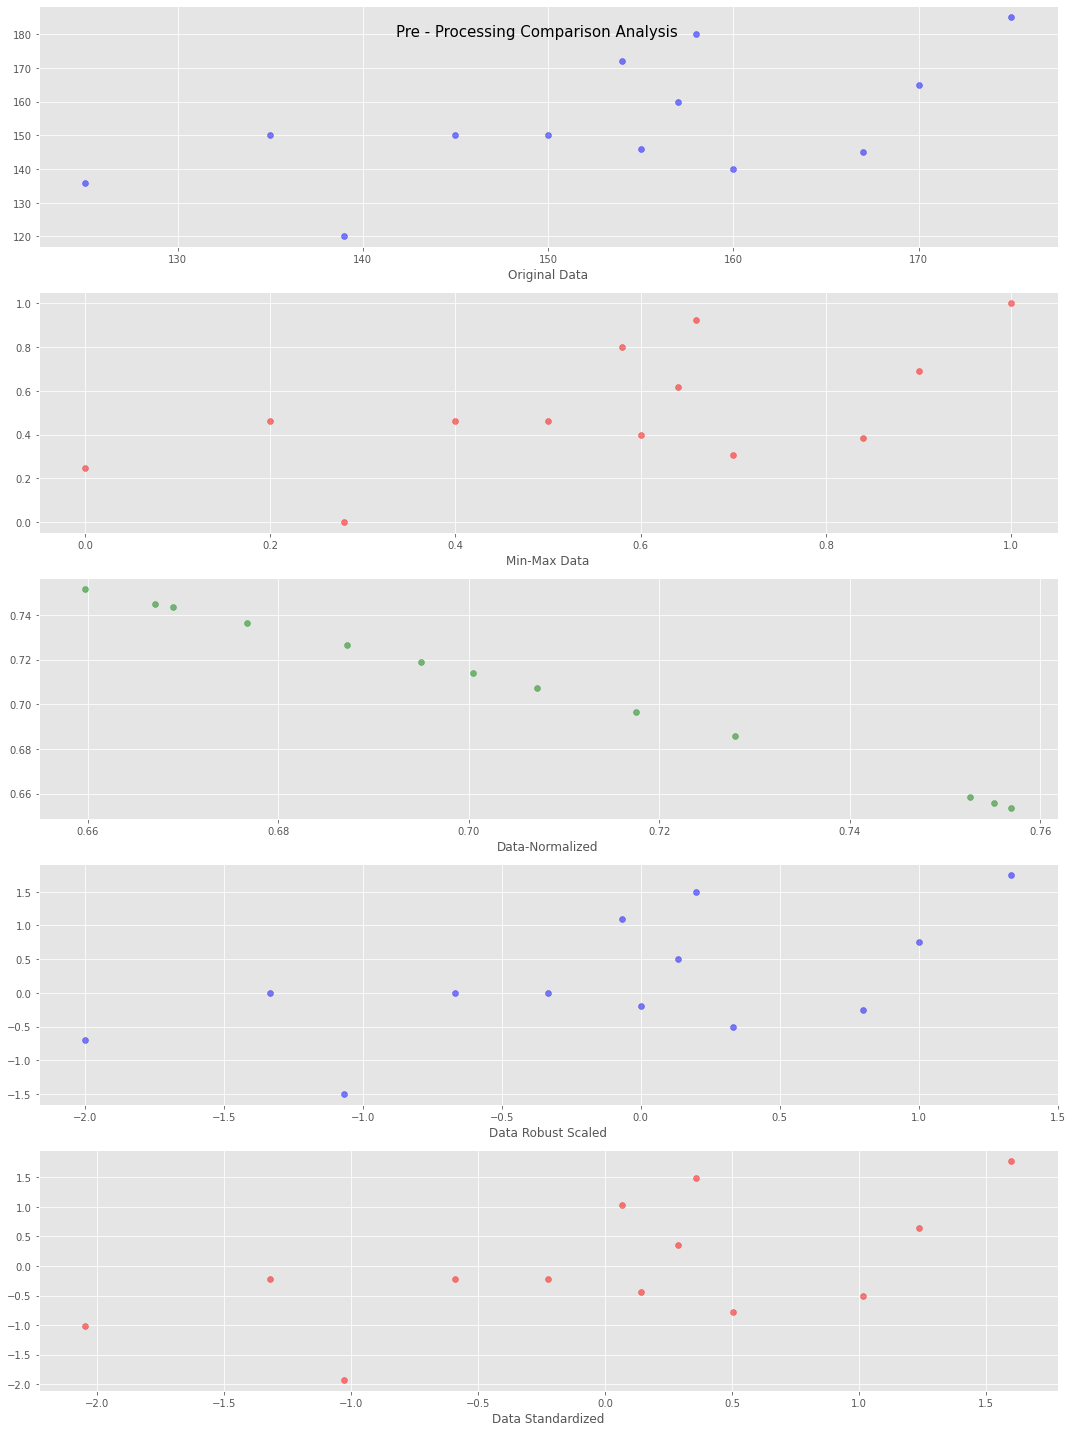

In [27]:
#Compute scatterplot analysis
fig, ax = plt.subplots(5, figsize = (15,20))
fig.suptitle('Pre - Processing Comparison Analysis', fontsize = 15)
plt.style.use('ggplot')

#Scatter-plots
ax[0].scatter(df['Height'], df['Weight'],color = 'b', alpha = 0.5)
ax[1].scatter(data_minmaxscaled['Height'], data_minmaxscaled['Weight'], color = 'r', alpha = 0.5)
ax[2].scatter(data_normalized['Height'], data_normalized['Weight'], color = 'g', alpha = 0.5)
ax[3].scatter(data_RobustScaled['Height'], data_RobustScaled['Weight'], color = 'b', alpha = 0.5)
ax[4].scatter(data_standardized['Height'], data_standardized['Weight'], color = 'r', alpha = 0.5)

#set x labels
ax[0].set_xlabel('Original Data')
ax[1].set_xlabel('Min-Max Data')
ax[2].set_xlabel('Data-Normalized')
ax[3].set_xlabel('Data Robust Scaled')
ax[4].set_xlabel('Data Standardized')

#Set spacing
fig.tight_layout()
plt.show()

### Normalization Analysis

Scales the data so that it will more accurtely a normaly distributed curve.

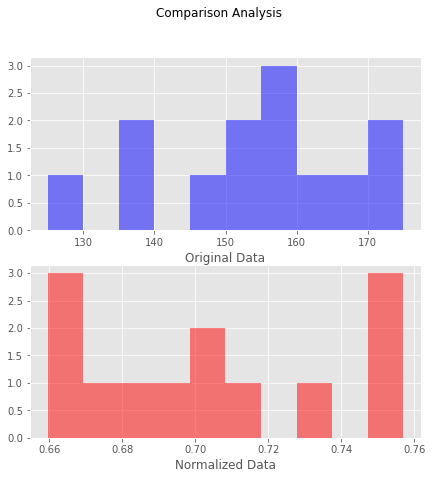

In [28]:
#Compute Histogram Analysis 2 axis
fig, ax = plt.subplots(2, figsize = (7,7))
fig.suptitle('Comparison Analysis')
plt.style.use('ggplot')
ax[0].hist(df['Height'],color = 'b', alpha = 0.5)
ax[1].hist(data_normalized['Height'], color = 'r', alpha = 0.5)
ax[0].set_xlabel('Original Data')
ax[1].set_xlabel('Normalized Data')
plt.show()